**Problem : Corona-Virus(COVID-19)**

---
Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus. Many people infected with the virus and experienced mild to moderate respiratory illness and recovered without requiring special treatment. However, some will become seriously ill and require medical attention. Dataset related to this virus has been analysed to find out the latent relationship among different wave, mortality and infection rate of several countries. This analysis may help to prepare our country for next wave or any other fatal disease..

**DataSet :** I have collect this dataset from **ourworlddata.org** to analysis the COVID details from January 2020 to till now.

**Data Analysis**

**Language :Python**

Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small- and large-scale projects.



**Packages Used :** Numpy , Pandas , Matplotlib , Seaborn

**Numpy:** NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

**Pandas:** Pandas is a Python library for data analysis. Pandas' primary data structures are DataFrames, which make it easier to perform analytical tasks in Python.

**Matplotlib :** Matplotlib is one of the most popular Python packages used for data visualization. It is a cross-platform library for making 2D plots from data in arrays.

**Seaborn :** Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.



In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline
from dateutil.parser import parse

# **WORLD TOTAL WAVE ANALYSIS**

Here I have shown the sample of World detail of COVID-19 which includes the iso-code,continent ,location-country,date wise total cases , total deaths, facilities details etc.. 

In [33]:
orig_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
display(orig_df.head())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192296,ZWE,Africa,Zimbabwe,2022-06-03,253236.0,185.0,182.429,5509.0,1.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192297,ZWE,Africa,Zimbabwe,2022-06-04,253236.0,0.0,182.429,5509.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192298,ZWE,Africa,Zimbabwe,2022-06-05,253338.0,102.0,178.000,5510.0,1.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192299,ZWE,Africa,Zimbabwe,2022-06-06,253508.0,170.0,202.286,5513.0,3.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


**Infected Cases :** I have selected date and total_cases column to show the infected cases date wise.

In [34]:
wave_total = orig_df[['date', 'total_cases']]
display(wave_total.tail())

,date,total_cases
192296,2022-06-03,253236.0
192297,2022-06-04,253236.0
192298,2022-06-05,253338.0
192299,2022-06-06,253508.0
192300,2022-06-07,253637.0


**parse :** This module offers a generic date/time string parser which is able to parse most known formats to represent a date and/or time.

# Number of confirmed cases of Continent

In [43]:
dftotal=orig_df['continent'].value_counts()
dftotal

Africa           44588
Europe           41878
Asia             41409
North America    29835
Oceania          12674
South America    10739
Name: continent, dtype: int64

In [41]:
orig_df['continent'].describe()

count     181123
unique         6
top       Africa
freq       44588
Name: continent, dtype: object

In [51]:
confirmed_continent=orig_df.groupby(['continent']).sum()
confirmed_continent

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
continent,,,,,,,,,,,,,,,,,,,,,
Africa,4.302338e+09,11899881.0,1.188031e+07,103128582.0,254124.0,253685.473,4.331687e+08,1.498211e+06,1.492132e+06,6.136470e+06,...,75660.6,804308.2,906751.060,49118.140,2870991.78,24216.253,18404286.0,1993.39,4037.77,2.599634e+05
Asia,4.185639e+10,153328753.0,1.529417e+08,544527461.0,1430400.0,1427256.084,1.288312e+09,5.278082e+06,5.258948e+06,1.090583e+07,...,152639.5,1263302.5,1516733.469,114239.500,3073038.01,28782.873,17970422.2,7699.58,13720.81,5.449464e+05
Europe,4.606084e+10,199242984.0,1.983688e+08,733104428.0,1843622.0,1839378.955,3.692226e+09,1.610454e+07,1.605857e+07,4.548692e+07,...,784189.9,1190899.2,233056.965,185766.161,3201830.33,30969.048,87171245.1,26048.51,48389.57,4.597216e+06
North America,3.216025e+10,100422639.0,1.000925e+08,617631125.0,1444071.0,1442223.598,1.197086e+09,5.648011e+06,5.604761e+06,1.413053e+07,...,75818.5,222443.7,831308.003,43791.700,2290521.91,14343.283,99420922.9,7688.60,12612.04,7.096672e+05
Oceania,8.526890e+08,9069722.0,8.898300e+06,2253473.0,12794.0,12574.873,2.556708e+08,1.999863e+06,1.977766e+06,1.725665e+06,...,99259.3,200761.5,99039.259,15414.470,933732.50,5407.033,-346302.0,-576.15,255.06,-4.311547e+04
South America,2.075096e+10,57961164.0,5.770215e+07,588257352.0,1275418.0,1274071.141,4.937979e+08,1.981699e+06,1.974630e+06,1.305235e+07,...,82483.7,164592.2,325449.328,20762.100,811710.09,7596.288,45599951.7,21189.01,23175.49,1.254754e+06


In [52]:
confirmed_continent.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='continent')

In [61]:
poi=['Africa', 'Asia', 'Europe', 'North America', 'Oceania','South America']
confirmed_continent['poi'].plot(figsize=(20,10), linewidth=5, colormap='brg', fontsize=20);

KeyError: 'poi'

Text(0.5, 1.0, 'World Covid Infected Cases')

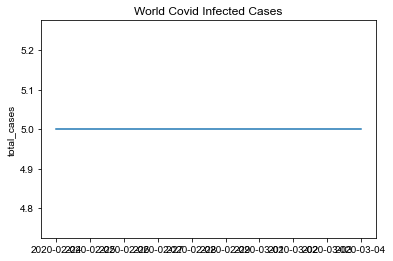

In [4]:
from dateutil.parser import parse
date_str1 = wave_total['date'].values
date_arr = []
for i in range(len(date_str1)):
    date_arr.append(parse(date_str1[i]))
sns.lineplot(x = date_arr  , y = wave_total["total_cases"], data = wave_total)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("World Covid Infected Cases")


## WORLD COVID FIRST WAVE 

In [5]:
world_first_wave = orig_df.loc[(orig_df['date'] >='2020-03-22') & (orig_df['date'] < '2021-05-01')]
# first_wave.tail()

totalcases = world_first_wave['total_cases'].replace(np.nan,0).to_numpy(np.int64)//1000
# print(totalcases)

In [6]:
wfw = world_first_wave[['date', 'total_cases']]
wfw.tail()

,date,total_cases


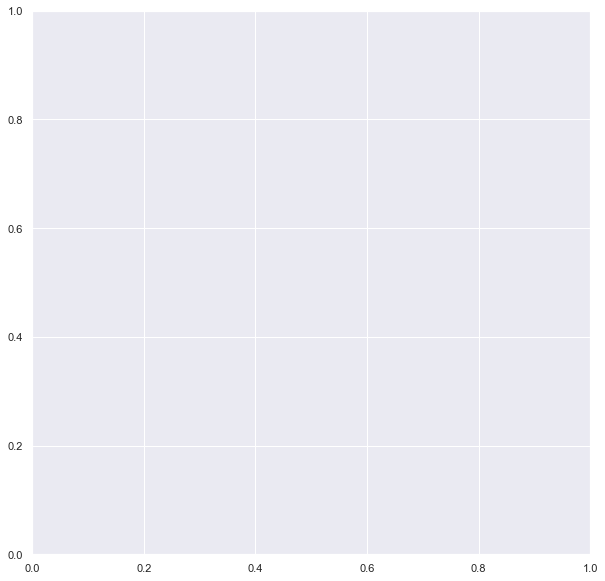

In [7]:

date_str3 = wfw['date'].values
date_arr3 = []
for i in range(len(date_str3)):
    date_arr3.append(parse(date_str3[i]))
sns.lineplot(x = date_arr3  , y = wfw["total_cases"], data = wfw)
sns.set(rc={'figure.figsize':(10,10)})

# **WORLD SECOND WAVE**:

In [8]:
world_second_wave =orig_df.loc[(orig_df['date'] >='2021-06-01') & (orig_df['date'] < '2021-12-31')]
# first_wave.tail()
totalcases1 = world_second_wave['total_cases'].replace(np.nan,0).to_numpy(np.int64)//1000
# print(totalcases)

In [9]:
wsw = world_second_wave[['date', 'total_cases']]
wsw.tail()

,date,total_cases


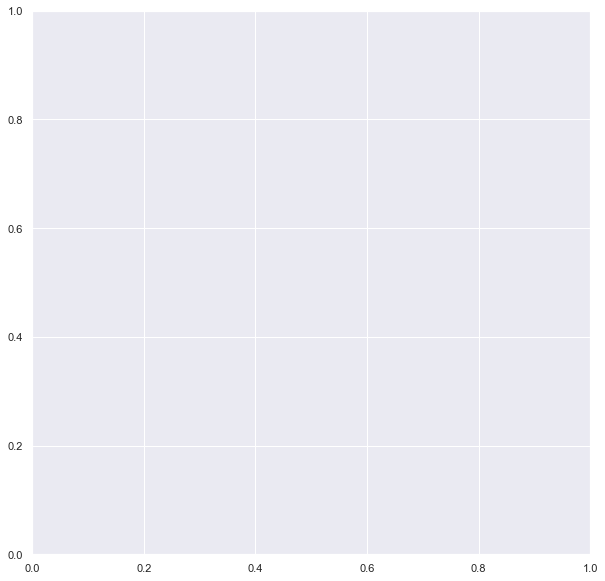

In [10]:

date_str4 = wsw['date'].values
date_arr4 = []
for i in range(len(date_str4)):
    date_arr4.append(parse(date_str4[i]))
sns.lineplot(x = date_arr4  , y = wsw["total_cases"], data = wsw)
sns.set(rc={'figure.figsize':(10,10)})

# **WORLD THIRD WAVE**

In [11]:
world_third_wave =orig_df.loc[(orig_df['date'] >='2022-01-01') & (orig_df['date'] < '2022-3-15')]
# first_wave.tail()
totalcases1 = world_third_wave['total_cases'].replace(np.nan,0).to_numpy(np.int64)//1000
# print(totalcases)

In [12]:
wtw = world_third_wave[['date', 'total_cases']]
wtw.tail()

,date,total_cases


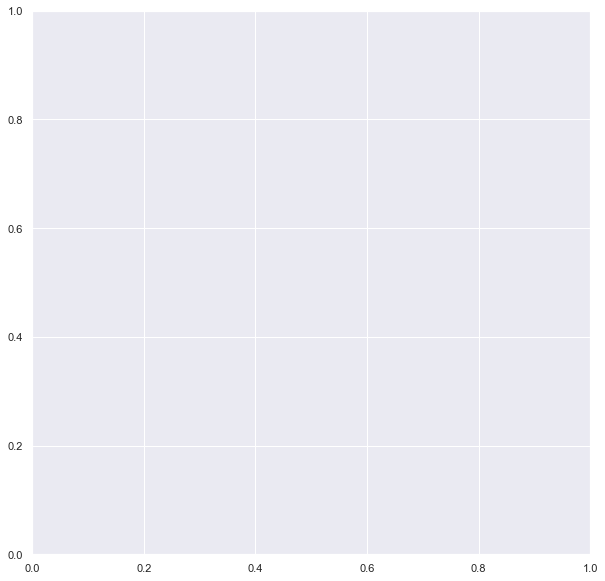

In [13]:
date_str4 = wtw['date'].values
date_arr4 = []
for i in range(len(date_str4)):
    date_arr4.append(parse(date_str4[i]))
sns.lineplot(x = date_arr4  , y = wtw["total_cases"], data = wtw)
sns.set(rc={'figure.figsize':(10,10)})

# **CONTINENT WAVE ANALYSIS**

In [14]:
#df_continent = orig_df.loc[orig_df['continent'].str.contains('Asia',na=False)]
# df_continent

In [15]:
# wave_continent = df_continent[['date', 'location','total_cases',]]
# wave_continent.head()

Text(0.5, 1.0, 'Continent total covid wave')

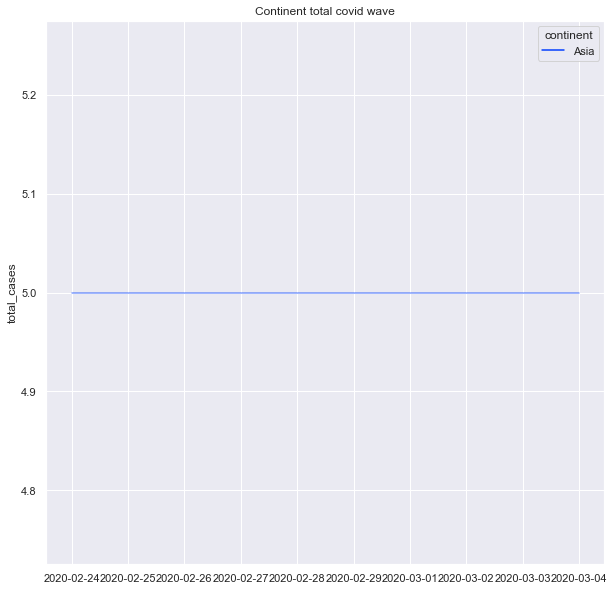

In [16]:
date_str = orig_df['date'].values
date_arr1 = []
for i in range(len(date_str)):
    date_arr1.append(parse(date_str[i]))
sns.lineplot(data=orig_df, x=date_arr1, y="total_cases",  hue="continent", palette="bright", alpha=0.5, sizes=(10, 1500))
# sns.color_palette("dark")
plt.title("Continent total covid wave")

**Conclusion :** According to this plot we have seen that South America has the highest Infected cases. 

# **Continent First wave**

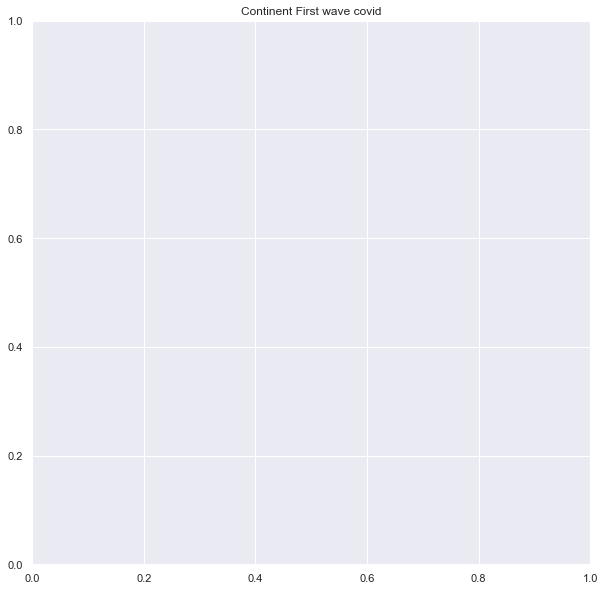

In [17]:
date_str4 = world_first_wave['date'].values
date_arr4 = []
for i in range(len(date_str3)):
    date_arr4.append(parse(date_str4[i]))
sns.lineplot(x = date_arr4  , y = world_first_wave["total_cases"], data = world_first_wave, hue="continent", palette="bright")
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Continent First wave covid")
plt.show()

# **Continent Second wave**

# **INDIA TOTAL WAVES ANALYSIS**

In [18]:
df_ind = orig_df.loc[orig_df['iso_code'].str.contains('IND')]
df_ind

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


In [19]:
wave_india = df_ind[['date', 'total_cases']]
wave_india.head()

,date,total_cases


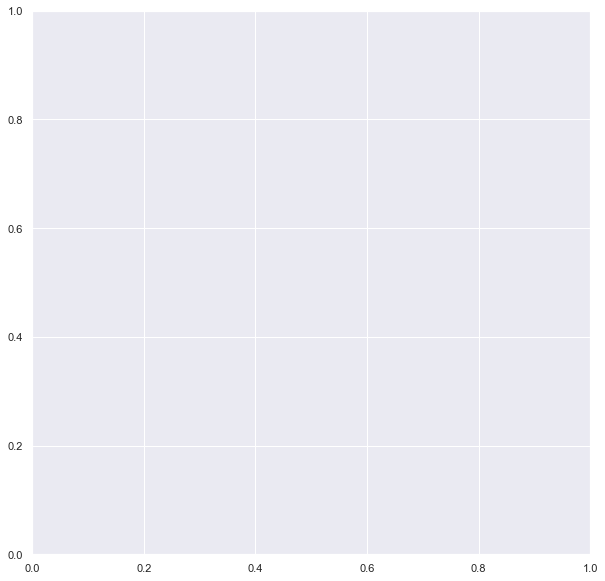

In [20]:
from dateutil.parser import parse
date_str = wave_india['date'].values
date_arr1 = []
for i in range(len(date_str)):
    date_arr1.append(parse(date_str[i]))
sns.lineplot(x = date_arr1  , y = wave_india["total_cases"].to_numpy(np.int64)//10000 ,data = wave_india )
sns.set(rc={'figure.figsize':(10,10)})

# **India First Wave**

In [21]:
wave1 = orig_df.loc[orig_df['iso_code'].str.contains('IND')&(orig_df['date'] >='2020-03-22') & (orig_df['date'] < '2021-05-01')]
totalcases =  wave1['total_cases'].replace(np.nan,0).to_numpy(np.int64)//1000
#totalcase

In [22]:
from dateutil.parser import parse
date_st = wave1['date'].values
date_ar = []
for i in range(len(date_st)):
    date_ar.append(parse(date_st[i]))

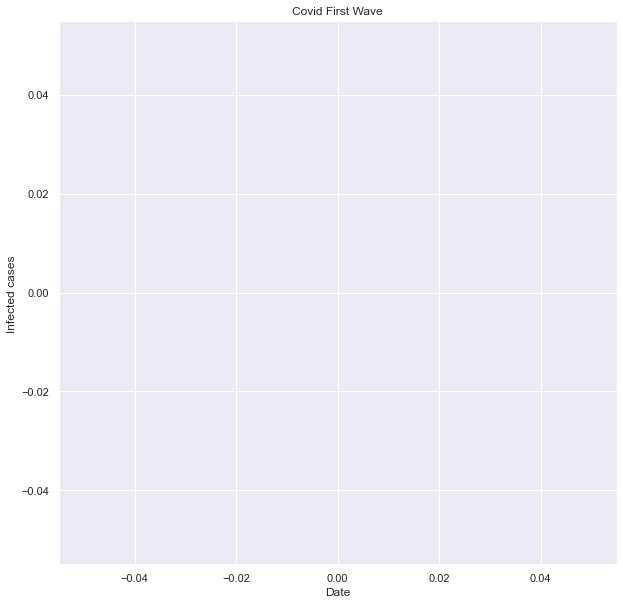

In [23]:
plt.plot(date_ar, totalcases)
plt.xlabel('Date')
plt.ylabel('Infected cases ')    
plt.title('Covid First Wave')
plt.show()

# **INDIA SECOND WAVE**

In [24]:
wave2 = orig_df.loc[orig_df['iso_code'].str.contains('IND')&(orig_df['date'] >='2021-06-01') & (orig_df['date'] < '2021-12-31')]
totalcase =  wave2['total_cases'].to_numpy(np.int64)//1000

In [25]:
from dateutil.parser import parse
date_s = wave2['date'].values
date_ar = []
for i in range(len(date_s)):
    date_ar.append(parse(date_s[i]))

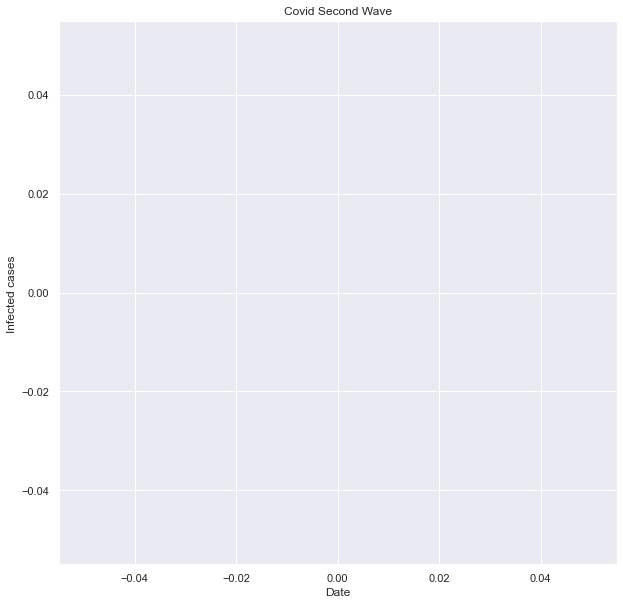

In [26]:
plt.plot(date_ar, totalcase)
plt.xlabel('Date')
plt.ylabel('Infected cases ')    
plt.title('Covid Second Wave')
plt.show()

# **INDIA THIRD WAVE**

In [27]:
wave3 = orig_df.loc[orig_df['iso_code'].str.contains('IND')&(orig_df['date'] >='2022-01-01') & (orig_df['date'] < '2022-3-15')]
totalcase =  wave3['total_cases'].to_numpy(np.int64)//1000

In [28]:
date_s = wave3['date'].values
date_ar = []
for i in range(len(date_s)):
    date_ar.append(parse(date_s[i]))

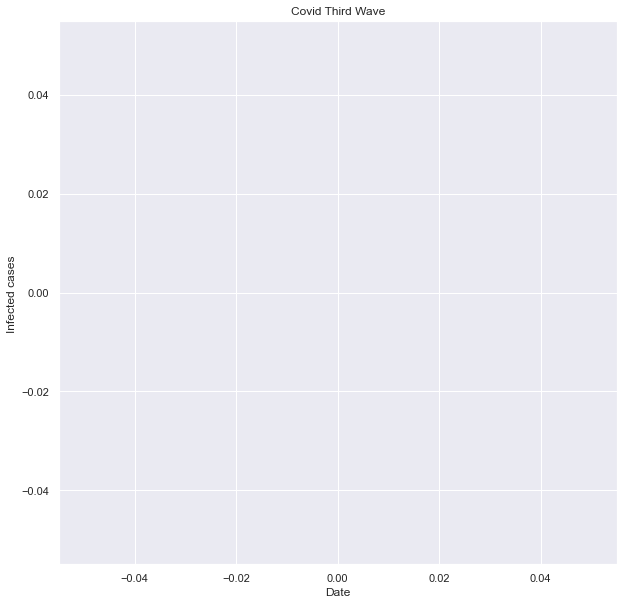

In [29]:
plt.plot(date_ar, totalcase)
plt.xlabel('Date')
plt.ylabel('Infected cases ')    
plt.title('Covid Third Wave')
plt.show()